In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns  # Imorting Seaborn library
import os
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix



df=pd.read_csv('Group16_ClassificationData.csv')
df.head()
df.tail()
y=df.Outcome
x = df.drop(["Outcome"], axis=1) 
x.info()
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

model=DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)


y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)


Acc_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy for CART Model: ", Acc_train)

Acc_test = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy for CART Model: ", Acc_test)

Training Accuracy for CART Model:  1.0
Testing Accuracy for CART Model:  0.7532467532467533


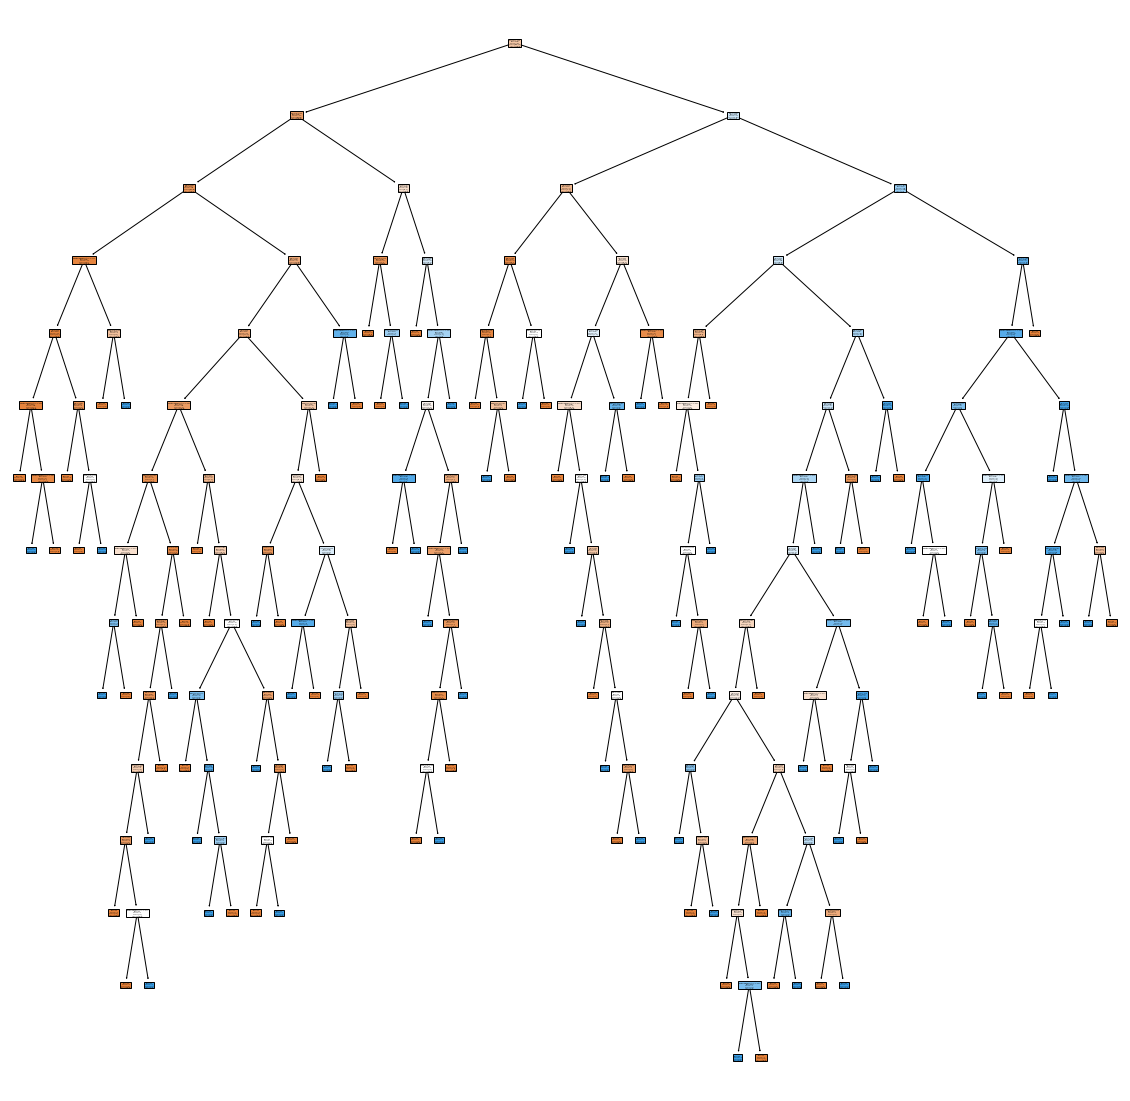

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(20,20))
_=tree.plot_tree(model, feature_names=x.columns, class_names=['Diabetes','None'], filled=True)
fig.savefig("CART_decistion_tree.png")

In [ ]:
Text=tree.export_text(model)
print(Text)

|--- feature_1 <= 123.50
|   |--- feature_0 <= 6.50
|   |   |--- feature_5 <= 30.65
|   |   |   |--- feature_6 <= 1.18
|   |   |   |   |--- feature_7 <= 43.50
|   |   |   |   |   |--- feature_6 <= 0.68
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  0.68
|   |   |   |   |   |   |--- feature_6 <= 0.69
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  0.69
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  43.50
|   |   |   |   |   |--- feature_5 <= 28.85
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  28.85
|   |   |   |   |   |   |--- feature_0 <= 2.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  2.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  1.18
|   |   |   |   |--- feature_0 <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  3.50
|   |   |   |   |   |--- class: 1
|   |   |--- f

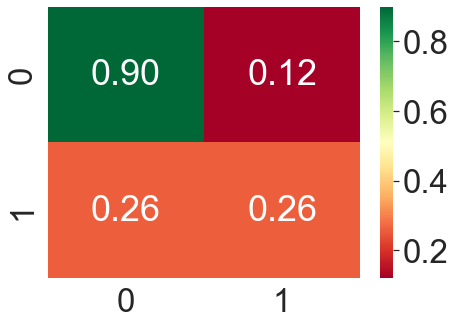

In [ ]:
# plotting correlation heatmap
plt.figure(figsize = (7,5))
sns.set(font_scale=3.0)
dataplot=sns.heatmap(confusion_matrix(y_test, y_pred_test)/100,annot=True, fmt='.2f', cmap='RdYlGn')